# Introduction to `pandas`
References: 
- "Python for Data Analysis" by Wes McKinney - for discussion on `pandas`
- ["Hacking Airline DataSet with H2O"](https://github.com/h2oai/h2o-2/wiki/Hacking-Airline-DataSet-with-H2O) -- for Airline data sets of [various sizes](https://s3.amazonaws.com/h2o-airlines-unpacked/)

**Prerequisities**: `pandas` is installed in your virtual environment

In [264]:
import pandas as pd

## `pandas` Data Types

### `Series`

In [265]:
tmp = pd.Series([3, 5, -1])
tmp

0    3
1    5
2   -1
dtype: int64

In [266]:
tmp.values

array([ 3,  5, -1])

In [267]:
tmp.index

RangeIndex(start=0, stop=3, step=1)

`DataFrame`

In [268]:
df_tmp = pd.DataFrame([3, 5, -1], columns=['col_name'])
df_tmp

,col_name
0,3
1,5
2,-1


In [269]:
df_tmp.shape

(3, 1)

In [270]:
df_tmp.columns

Index(['col_name'], dtype='object')

In [271]:
df_tmp['col_name'].values

array([ 3,  5, -1])

In [272]:
df_tmp.index

RangeIndex(start=0, stop=3, step=1)

## Reading-in Data

In [273]:
file_name = "https://s3.amazonaws.com/h2o-airlines-unpacked/year1987.csv"
df = pd.read_csv(filepath_or_buffer=file_name,
                 encoding='latin-1',
                 nrows=1000
                )

In [274]:
# Alternative to ?pd.read_csv to see function arguments:
import inspect
inspect.signature(pd.read_csv)

<Signature (filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

Other file formats you can read-in:
- CSV and non-CSV delimited: `read_table`
- JSON via `read_json`
- fixed-width format via `read_fwf`
- data on clipboard via `read_clipboard`

## EDA or Getting to Know your Data Set

### Step 1: Read [documentation and data dictionary](http://stat-computing.org/dataexpo/2009/the-data.html)

![Screenshot of Airline data documentation](images/Airlines_documentation.png)

### Step 2: Basic Checks
- size
- shape
- values/ranges
- degree of missingness
- `<your favorite check(s)>`

In [275]:
df.shape

(1000, 31)

In [276]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'IsArrDelayed', 'IsDepDelayed'],
      dtype='object')

In [277]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,NaN,91.0,79,NaN,23.0,11.0,SAN,SFO,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,NaN,94.0,79,NaN,14.0,-1.0,SAN,SFO,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,NO
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,NaN,97.0,79,NaN,29.0,11.0,SAN,SFO,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,NaN,78.0,79,NaN,-2.0,-1.0,SAN,SFO,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NO,NO
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,NaN,93.0,79,NaN,33.0,19.0,SAN,SFO,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES


In [278]:
pd.options.display.max_columns = 50

In [279]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
995,1987,10,16,5,632.0,630,730.0,727,PS,1503,NaN,58.0,57,NaN,3.0,2.0,LAX,SJC,308,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
996,1987,10,19,1,632.0,630,733.0,727,PS,1503,NaN,61.0,57,NaN,6.0,2.0,LAX,SJC,308,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
997,1987,10,20,2,633.0,630,727.0,727,PS,1503,NaN,54.0,57,NaN,0.0,3.0,LAX,SJC,308,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NO,YES
998,1987,10,21,3,642.0,630,735.0,727,PS,1503,NaN,53.0,57,NaN,8.0,12.0,LAX,SJC,308,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
999,1987,10,22,4,630.0,630,727.0,727,PS,1503,NaN,57.0,57,NaN,0.0,0.0,LAX,SJC,308,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NO,NO


In [280]:
df['Year'].value_counts(sort=False)

1987    1000
Name: Year, dtype: int64

In [281]:
from collections import Counter
Counter(df['Month'])

Counter({10: 1000})

In [282]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1000.0,1000.0,1000.000000,1000.000000,993.000000,1000.000000,993.000000,1000.00000,1000.000000,0.0,993.000000,1000.000000,0.0,993.000000,993.000000,1000.000000,0.0,0.0,1000.000000,0.0,1000.0,0.0,0.0,0.0,0.0,0.0
mean,1987.0,10.0,16.221000,3.891000,1409.534743,1399.275000,1526.275932,1510.93200,1478.329000,NaN,73.579053,68.037000,NaN,13.495468,7.963746,360.390000,NaN,NaN,0.007000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,8.915135,1.912793,490.224507,483.528604,492.677662,483.29743,15.214211,NaN,13.097419,12.095203,NaN,18.248294,16.041048,93.866239,NaN,NaN,0.083414,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,1987.0,10.0,1.000000,1.000000,628.000000,630.000000,9.000000,12.00000,1451.000000,NaN,16.000000,17.000000,NaN,-11.000000,-8.000000,11.000000,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25%,1987.0,10.0,8.000000,2.000000,934.000000,930.000000,1038.000000,1035.00000,1465.000000,NaN,66.000000,61.000000,NaN,3.000000,-1.000000,325.000000,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,1987.0,10.0,16.000000,4.000000,1505.000000,1505.000000,1614.000000,1608.00000,1480.000000,NaN,76.000000,72.000000,NaN,8.000000,1.000000,371.000000,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,1987.0,10.0,24.000000,5.000000,1846.000000,1830.000000,1958.000000,1936.00000,1491.000000,NaN,82.000000,76.000000,NaN,18.000000,9.000000,446.000000,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
max,1987.0,10.0,31.000000,7.000000,2319.000000,2300.000000,2349.000000,2342.00000,1503.000000,NaN,141.000000,90.000000,NaN,187.000000,140.000000,550.000000,NaN,NaN,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN


**Caution**: Missing values are ignored and counts not shown.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
Year                 1000 non-null int64
Month                1000 non-null int64
DayofMonth           1000 non-null int64
DayOfWeek            1000 non-null int64
DepTime              993 non-null float64
CRSDepTime           1000 non-null int64
ArrTime              993 non-null float64
CRSArrTime           1000 non-null int64
UniqueCarrier        1000 non-null object
FlightNum            1000 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    993 non-null float64
CRSElapsedTime       1000 non-null int64
AirTime              0 non-null float64
ArrDelay             993 non-null float64
DepDelay             993 non-null float64
Origin               1000 non-null object
Dest                 1000 non-null object
Distance             1000 non-null int64
TaxiIn               0 non-null float64
TaxiOut              0 non-null float64
Cancelled            1000 non

## Aside: Missing Values in Python
When you need to check for missing values -- similar to R, you can't do `variable == NaN' -- you can check for:
- `variable_value is None`
- `math.isnan(variable_value)` -- after importing the `math` library
- `pd.isnull(variable_value)`
- non-emptiness per section [Truth Value testing](https://docs.python.org/3/library/stdtypes.html): 
  - `not []`
  - `not ""`
  - etc.

Topic of handling missing data is an important topic outside scope of class. Recommend book by [Little and Rubin](https://www.amazon.com/Statistical-Analysis-Missing-Probability-Statistics-dp-0470526793/dp/0470526793/ref=mt_hardcover?_encoding=UTF8&me=&qid=) on the subject. 

Recall that **it's not recommended** to:
- drop all missing values, OR
- fill-in missing values with mean (for example)
to not bias your data.

It's better to:
- understand why the data was missing in first place AND, if need to,
- fill-in with a `missing` category: `dataset.fillna('Missing')`

## Subsetting

In [284]:
# Arrival Delays of 1.5+ hours:
df[ df['ArrDelay'] >= 90]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
429,1987,10,16,5,1942.0,1830,2107.0,1936,PS,1477,NaN,85.0,66,NaN,91.0,72.0,LAX,SFO,337,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
434,1987,10,22,4,2045.0,1830,2243.0,1936,PS,1477,NaN,118.0,66,NaN,187.0,135.0,LAX,SFO,337,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
571,1987,10,5,1,2104.0,1945,2244.0,2101,PS,1484,NaN,100.0,76,NaN,103.0,79.0,SFO,SAN,447,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
731,1987,10,28,3,1839.0,1630,1934.0,1721,PS,1491,NaN,55.0,51,NaN,133.0,129.0,LAS,SNA,226,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
943,1987,10,11,7,2005.0,1745,2124.0,1855,PS,1500,NaN,79.0,70,NaN,149.0,140.0,SMF,LAX,373,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
981,1987,10,23,5,2159.0,2027,2312.0,2137,PS,1502,NaN,73.0,70,NaN,95.0,92.0,SMF,LAX,373,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES


In [285]:
# Departure Delays of 1+ hours:
df['DepDelay'][ df['DepDelay'] >= 60].count()

19

**Warning** when subsetting and assigning in `pandas`: 
- When you subset a data set, you can access a view or copy [reference]](https://www.dataquest.io/blog/settingwithcopywarning/) and [[reference]](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=set#indexing-view-versus-copy).
- If you try to assign values on your subset, you will get a `SettingWithCopy` warning, to make sure you check that you're assigning values to the data set you expect (e.g. view or copy).

In [286]:
# Recall our data set:
df_tmp

,col_name
0,3
1,5
2,-1


Example of warning:

In [287]:
df_tmp[df_tmp['col_name'] == 5]

,col_name
1,5


In [288]:
df_tmp[df_tmp['col_name'] == 5]['col_name'] = -5

/Users/irina/Documents/Stats_404_W19/Envs/env-stats404-class0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


![Subsetting in `pandas`](images/pandas-subsetting.png) [Reference](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

### Subsetting with `loc` -- based on "**l**abels":

In [289]:
df.loc[df['ArrDelay'] >= 90, ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay']]

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay
429,1987,10,16,5,91.0,72.0
434,1987,10,22,4,187.0,135.0
571,1987,10,5,1,103.0,79.0
731,1987,10,28,3,133.0,129.0
943,1987,10,11,7,149.0,140.0
981,1987,10,23,5,95.0,92.0


### Subsetting with `iloc` -- based on "**i**ndex":

In [290]:
import numpy as np
np.where(df['ArrDelay'] >= 90)

(array([429, 434, 571, 731, 943, 981]),)

How can we format this to be a list?

In [291]:
row_index = np.where(df['ArrDelay'] >= 90)[0].tolist()
row_index

[429, 434, 571, 731, 943, 981]

In [292]:
col_index = list(range(4)) + list(range(13, 15))
col_index

[0, 1, 2, 3, 13, 14]

In [293]:
df.iloc[row_index, col_index]

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay
429,1987,10,16,5,NaN,91.0
434,1987,10,22,4,NaN,187.0
571,1987,10,5,1,NaN,103.0
731,1987,10,28,3,NaN,133.0
943,1987,10,11,7,NaN,149.0
981,1987,10,23,5,NaN,95.0


## Visual Checks

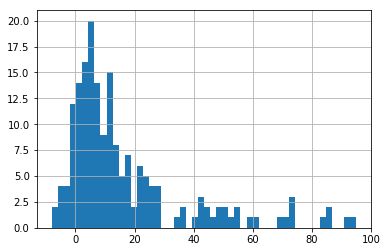

In [294]:
%matplotlib inline

# Flight arrival delays for Friday flights in 10/1987:
df['ArrDelay'][df['DayOfWeek'] == 5].hist(bins=50)

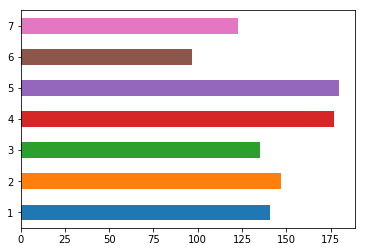

In [295]:
%matplotlib inline

df['DayOfWeek'].value_counts(sort=False).plot(kind='barh')

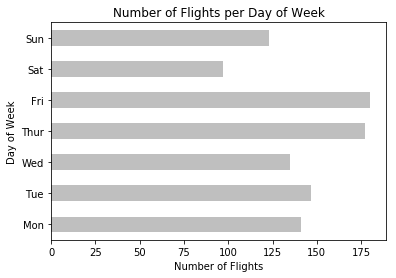

In [296]:
%matplotlib inline
import matplotlib.pyplot as plt

# Per http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# gca stands for 'get current axis'
ax = plt.gca()
df['DayOfWeek'].value_counts(sort=False).plot(kind='barh',
                                              color='0.75',
                                              x="Number of Flights",
                                              y="Day of Week",
                                              ax=ax
                                              )
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax.set_title("Number of Flights per Day of Week")
ax.set_xlabel("Number of Flights")
ax.set_ylabel("Day of Week")
plt.show()

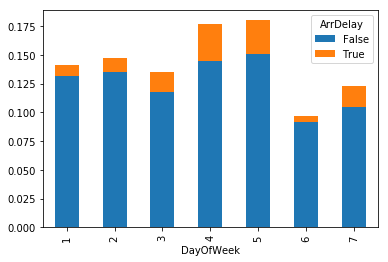

In [297]:
# Stacked bar plot
df_crosstab = pd.crosstab(df['DayOfWeek'], df['ArrDelay'] >= 30, normalize=True)
df_crosstab.plot(kind='bar', stacked=True)

Aside: interactive graphics in Python via [`plotly`](https://plot.ly/python/)

## Row/Column Operations

In [298]:
# Derive quantity based on one column:
df['ArrDelay_hours'] = df['ArrDelay'].apply(lambda x: round(x/60.0, 2))
df[['ArrDelay', 'ArrDelay_hours']].head(5)

,ArrDelay,ArrDelay_hours
0,23.0,0.38
1,14.0,0.23
2,29.0,0.48
3,-2.0,-0.03
4,33.0,0.55


In [299]:
# Derive quantity based on more than one column:
def number_of_delays(arrival_delayed_flag, departure_delayed_flag):
    """Fcn to count how many delays there were per flight."""
    count = 0
    if arrival_delayed_flag == 'YES':
        count += 1
    if departure_delayed_flag == 'YES':
        count += 1
    return count

df['delay_count'] = df[['IsArrDelayed', 'IsDepDelayed']].apply(
    lambda row: number_of_delays(row[0], row[1]),
    axis=1)
df[['ArrDelay', 'IsArrDelayed', 'DepDelay', 'IsDepDelayed', 'delay_count']].head()

,ArrDelay,IsArrDelayed,DepDelay,IsDepDelayed,delay_count
0,23.0,YES,11.0,YES,2
1,14.0,YES,-1.0,NO,1
2,29.0,YES,11.0,YES,2
3,-2.0,NO,-1.0,NO,0
4,33.0,YES,19.0,YES,2


## 10 minute break

# Intermediate `pandas`
## Concatenating, Merging and Joining, Pivoting, Grouping

For more examples on concatenating and merging, please see: [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html)

### Example data sets

In [300]:
df1 = pd.DataFrame({'A': [1, 2],
                    'B': [3, 4]
                   }
                  )
df1

,A,B
0,1,3
1,2,4


In [301]:
df2 = pd.DataFrame({'A': [1, 2, 1],
                    'B': [3, 3, 4],
                    'C': [0, -1, 2]
                   },
                   index=[0, 1, 2]
                  )
df2

,A,B,C
0,1,3,0
1,2,3,-1
2,1,4,2


### Concatenating

In [302]:
# rbind() equivalent:
df1.append(df2)

/Users/irina/Documents/Stats_404_W19/Envs/env-stats404-class0/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C
0,1,3,NaN
1,2,4,NaN
0,1,3,0.0
1,2,3,-1.0
2,1,4,2.0


In [303]:
# Fix warning message using provided recomendations:
df1.append(df2, sort=False)

,A,B,C
0,1,3,NaN
1,2,4,NaN
0,1,3,0.0
1,2,3,-1.0
2,1,4,2.0


In [304]:
inspect.signature(df1.append)

<Signature (other, ignore_index=False, verify_integrity=False, sort=None)>

In [305]:
# Axis=0 for rows and axis=1 for columns:
pd.concat([df1, df2], axis=1)

,A,B,A,B,C
0,1.0,3.0,1,3,0
1,2.0,4.0,2,3,-1
2,NaN,NaN,1,4,2


In [306]:
inspect.signature(pd.concat)

<Signature (objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)>

In [307]:
# similar to cbind():
pd.concat([df1, df2], axis=1, join='inner')

,A,B,A,B,C
0,1,3,1,3,0
1,2,4,2,3,-1


### Merging and Joining

![Visualization of Joins](images/joins.png)[[reference]](https://www.dofactory.com/sql/join)

In [308]:
pd.merge(left=df1,
         right=df2, 
         how='left',
         on=['A', 'B'])

,A,B,C
0,1,3,0.0
1,2,4,NaN


In [309]:
inspect.signature(pd.merge)

<Signature (left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)>

![Joins that you can do in pandas](./images/pandas-merge-args.png)

In [310]:
df_merged = pd.merge(left=df1,
                     right=df2, 
                     how='outer',
                     on=['A', 'B'],
                     indicator='indicator_column')
df_merged

,A,B,C,indicator_column
0,1,3,0.0,both
1,2,4,NaN,left_only
2,2,3,-1.0,right_only
3,1,4,2.0,right_only


**TIPs**: 
- Write out tables that you're going to be combining, columns of interest (to keep in final table), and column(s) that they share. It will be easier to define the merge/SQL/etc. statements.

- Usually `merge` is the answer (over `append` or `concat`), and it's easier to follow, as you're explicitly stating what you're doing.

### Pivoting
EX: Get counts of flight delay durations (categorical) by day of week.

What should be our first step in creating a categorical variable for departure delays?

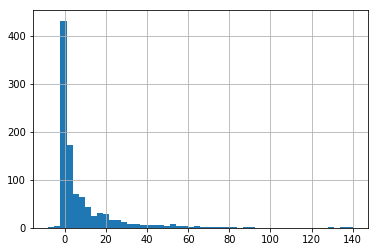

In [311]:
# Step 1: Explore distribution of flight departure delays for all days of week:
df['DepDelay'].hist(bins=50)

In [312]:
# Step 2: Create buckets of departure delays and check distribution:
df['DepDelay_bins'] = pd.cut(df['DepDelay'], bins=[-15, -1, 0, 15, 30, 45, 60, 90, 3000])
df['DepDelay_bins'].value_counts(sort=False)

(-15, -1]     257
(-1, 0]       180
(0, 15]       377
(15, 30]      104
(30, 45]       32
(45, 60]       24
(60, 90]       15
(90, 3000]      4
Name: DepDelay_bins, dtype: int64

In [313]:
# Step 3: Add a count of observations 'n':
df_delays = df[['DayOfWeek', 'DepDelay_bins']]
df_delays = df_delays.assign(n=1)
df_delays.head()

,DayOfWeek,DepDelay_bins,n
0,3,"(0, 15]",1
1,4,"(-15, -1]",1
2,6,"(0, 15]",1
3,7,"(-15, -1]",1
4,1,"(15, 30]",1


In [314]:
# Step 4: Get counts of flight delays by DOW and duration of delay:
df_delays.pivot_table(index="DepDelay_bins", columns="DayOfWeek", aggfunc=sum)

n                                    
DayOfWeek         1     2     3     4     5     6     7
DepDelay_bins                                          
(-15, -1]      48.0  44.0  41.0  23.0  30.0  43.0  28.0
(-1, 0]        24.0  26.0  24.0  31.0  27.0  26.0  22.0
(0, 15]        54.0  50.0  47.0  78.0  80.0  22.0  46.0
(15, 30]        8.0  21.0  12.0  24.0  17.0   4.0  18.0
(30, 45]        1.0   1.0   5.0   8.0  12.0   NaN   5.0
(45, 60]        1.0   4.0   3.0   7.0   4.0   2.0   3.0
(60, 90]        2.0   NaN   1.0   3.0   9.0   NaN   NaN
(90, 3000]      NaN   NaN   1.0   1.0   1.0   NaN   1.0

### Grouping

![Split-apply-combine strategy of grouping](./images/split-apply-combine.png) [reference](https://jakevdp.github.io/blog/2017/03/22/group-by-from-scratch/)

In [315]:
# What paths did the carrier fly out of LA County:
df_origin_dest_LA = df.loc[df['Origin'].isin(('BUR', 'LAX', 'LGB')),
                           ['Origin', 'Dest']]
df_origin_dest_LA = df_origin_dest_LA.assign(n=1)
df_origin_dest_LA.groupby(['Origin', 'Dest']).sum()

n
Origin Dest    
BUR    OAK   81
LAX    SAN    2
       SFO   85
       SJC   13

In [316]:
# What's the average delay:
df.groupby(['UniqueCarrier', 'DayOfWeek'])['ArrDelay'].mean()

UniqueCarrier  DayOfWeek
PS             1             9.688406
               2            11.767123
               3            13.470149
               4            17.537143
               5            16.683333
               6             7.876289
               7            13.861789
Name: ArrDelay, dtype: float64

In [317]:
# If there is a delay, what's the average delay:
df.loc[df['ArrDelay'] >= 0].groupby(
    ['UniqueCarrier', 'DayOfWeek'])['ArrDelay'].mean()

UniqueCarrier  DayOfWeek
PS             1            11.779661
               2            13.713178
               3            15.837607
               4            19.012270
               5            18.367470
               6            11.116883
               7            15.900000
Name: ArrDelay, dtype: float64

In [318]:
# Largest delay type by flightpath origin:

def largest_delay(variables):
    max_arrival_delay = max(variables.ArrDelay)
    max_departure_delay = max(variables.DepDelay)
    if math.fabs(max_arrival_delay) > max_departure_delay:
        return 'arrival'
    elif math.fabs(max_arrival_delay) < max_departure_delay:
        return 'departure'
    else:
        return 'arival-and-departure'
    
df[['Origin', 'ArrDelay', 'DepDelay']].groupby('Origin').apply(
    lambda x: largest_delay(x))
# SAN = San Diego

Origin
BUR      arrival
LAS      arrival
LAX      arrival
OAK      arrival
PHX      arrival
SAN    departure
SFO      arrival
SJC      arrival
SMF      arrival
SNA      arrival
dtype: object

## Prerequisites for Next Section: SQL

**Please see slide [deck](https://goo.gl/JkLxHq)** for installation instructions of SQLite

## 10 minute break

## pandas and Databases

### `pandasql`
- [`pandasql`](https://pypi.org/project/pandasql/) gives you ability to run `SQL` queries on your `pandas` data set
- Similar to [`sqldf`](https://cran.r-project.org/web/packages/sqldf/sqldf.pdf) package in `R`
- Uses `SQLite` syntax [reference](https://pypi.org/project/pandasql/)

In [319]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())  
# globals b/c we're using variables defined in global scope, in notebook:

In [320]:
pysqldf("""SELECT Origin, Dest, count(*) 
           FROM df_origin_dest_LA
           GROUP BY Origin, Dest;""")

,Origin,Dest,count(*)
0,BUR,OAK,81
1,LAX,SAN,2
2,LAX,SFO,85
3,LAX,SJC,13


Now you can run SQL queries against your `pandas` dataset.

### Reading-in Data from Database

Other ways to create `pandas` data frames, from:
- lists and dictionaries: http://pbpython.com/pandas-list-dict.html
- JSON (and other file formats), as we saw earlier today
- direct pull from database


In [321]:
import sqlite3

In [322]:
# Step 1: Connect to DB, per https://www.dataquest.io/blog/python-pandas-databases/
conn = sqlite3.connect("chinook.db")

In [323]:
# Step 2: Execute query and send results to pandas dataframe:
df = pd.read_sql_query("""SELECT *
                          FROM artists
                          LIMIT 5;""",
                       conn)
df

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


Now you can execute SQL queries against your database and send results to a `pandas` dataframe.

**TIP** To determine when to:
- execute in database and pull-in results into `pandas` dataframe OR 
- read into `pandas` datafrmae and then execute SQL commands

answer depends... on size of original dataset, (any) constraints on computational time for end-to-end analysis, etc. Please see [here](https://medium.com/carwow-product-engineering/sql-vs-pandas-how-to-balance-tasks-between-server-and-client-side-9e2f6c95677) for a more in-depth discussion.

# Advanced `pandas`
To be covered later in course, when we talk about applications of `pandas` to big data.